<a href="https://colab.research.google.com/github/SamrithaaPrabakar/Handwritten_Numbers_MNIST/blob/main/Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


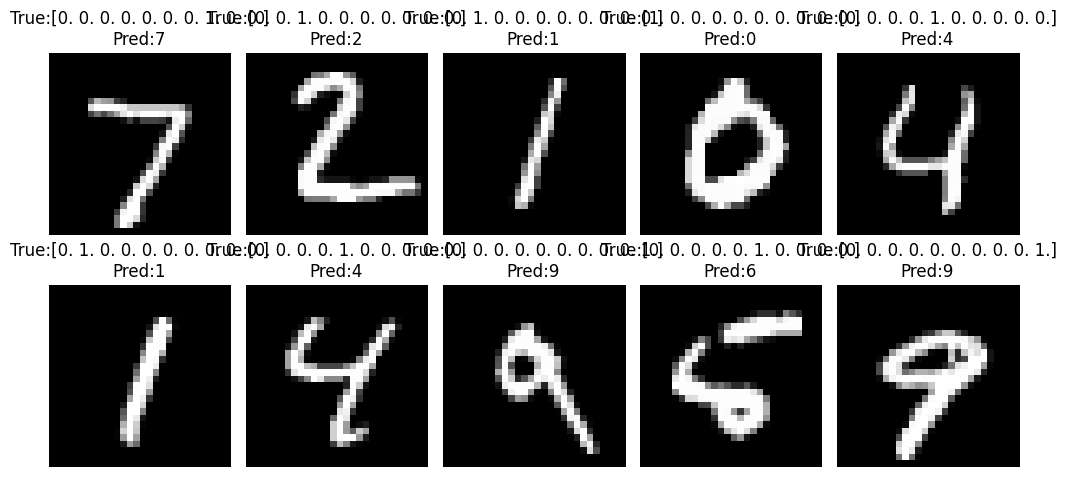

In [12]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i], cmap="gray")
    plt.title(f"True:{y_test[i]}\nPred:{y_pred_classes[i]}")
    plt.axis("off")
plt.tight_layout()
plt.show()

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train = x_train / 255.0
x_test = x_test / 255.0


In [4]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [5]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8661 - loss: 0.4485 - val_accuracy: 0.9670 - val_loss: 0.1126
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9671 - loss: 0.1075 - val_accuracy: 0.9762 - val_loss: 0.0793
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9768 - loss: 0.0734 - val_accuracy: 0.9778 - val_loss: 0.0724
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9820 - loss: 0.0564 - val_accuracy: 0.9787 - val_loss: 0.0825
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9863 - loss: 0.0428 - val_accuracy: 0.9758 - val_loss: 0.0918


In [8]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

Test Accuracy: 0.9743


In [9]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

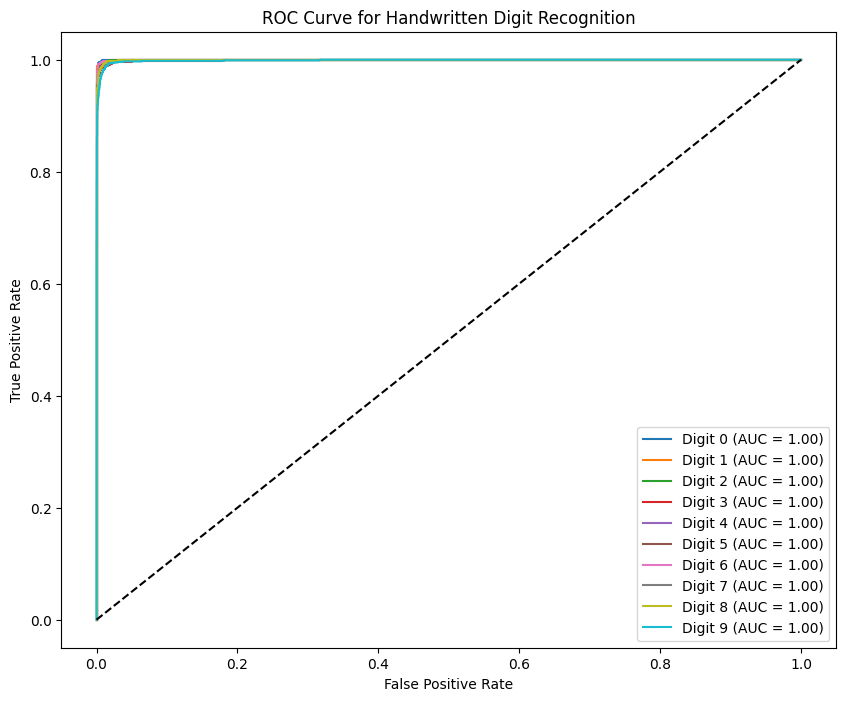

In [11]:
y_test_bin = label_binarize(y_test, classes=list(range(10)))

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for all classes
plt.figure(figsize=(10, 8))
for i in range(10):
    plt.plot(fpr[i], tpr[i],
             label=f"Digit {i} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Handwritten Digit Recognition")
plt.legend(loc="lower right")
plt.show()